<a href="https://colab.research.google.com/github/GrzegorzSzczepanek/deep_learning_fun/blob/main/training_on_basic_linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from torch.utils.data import DataLoader

In [ ]:
random_tensor = torch.rand(2, 3)
random_tensor = torch.where(random_tensor >= 0.5, 1, 0)

random_tensor

tensor([[0, 1, 0],
        [1, 1, 0]])

In [ ]:
weight = 0.3
bias = 0.9
start = 0
end = 2
step = 0.02
torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
# Create train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="training_data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing_data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});

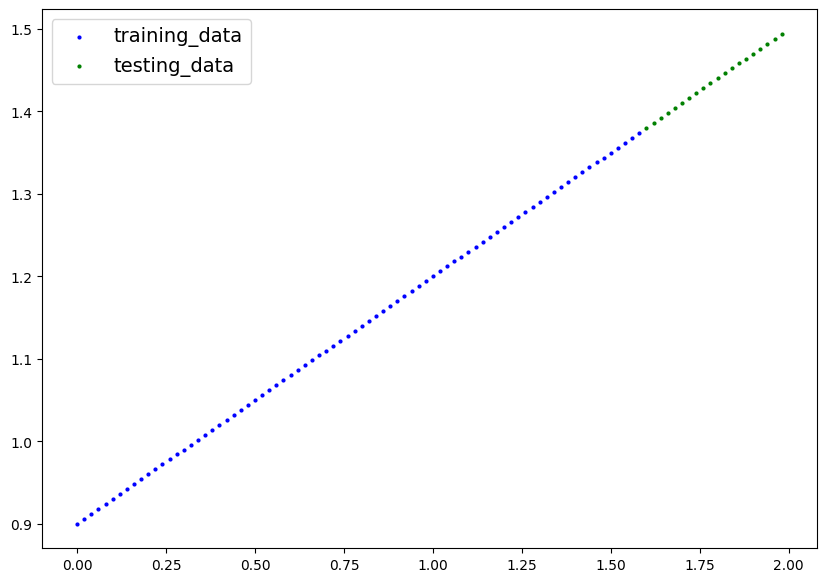

In [ ]:
plot_predictions()

In [ ]:
class Linear_Model(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               out_features: int):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    self.layer_block1 = nn.Sequential(
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=out_features)
    )

  def forward(self, x):
    return self.layer_block1(x)

model = Linear_Model(input_shape=1, hidden_units=1, out_features=1).to(device)
model, model.state_dict()

(Linear_Model(
   (layer_block1): Sequential(
     (0): Linear(in_features=1, out_features=1, bias=True)
     (1): Linear(in_features=1, out_features=1, bias=True)
     (2): Linear(in_features=1, out_features=1, bias=True)
   )
 ),
 OrderedDict([('weights', tensor([-0.7019])),
              ('bias', tensor([-0.4096])),
              ('layer_block1.0.weight', tensor([[-0.0924]])),
              ('layer_block1.0.bias', tensor([-0.0099])),
              ('layer_block1.1.weight', tensor([[0.7310]])),
              ('layer_block1.1.bias', tensor([-0.4622])),
              ('layer_block1.2.weight', tensor([[-0.8900]])),
              ('layer_block1.2.bias', tensor([-0.5201]))]))

In [ ]:
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=0.01)

In [ ]:
def train_step(model: torch.nn.Module,
               data: torch.Tensor,
               labels: torch.Tensor,
               loss_fn: torch.nn,
               optimizer: torch.optim):
  pred = model(data)
  loss = loss_fn(pred, labels)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



In [ ]:
def test_step(model: torch.nn.Module,
              data: torch.Tensor,
              labels: torch.Tensor,
              loss_fn: torch.nn):
  with torch.inference_mode():
    pred = model(data)
    test_loss = loss_fn(pred, labels)


In [ ]:
from tqdm.auto import tqdm

def train_and_test(model: torch.nn.Module,
                   training_data: torch.Tensor,
                   training_labels: torch.tensor,
                   test_data: torch.Tensor,
                   test_labels: torch.Tensor,
                   loss_fn: torch.nn,
                   optimizer: torch.optim,
                   epochs: int,
                   device = device):
  model.to(device)
  training_data, training_labels = training_data.to(device), training_labels.to(device)
  test_data, test_labels = test_data.to(device), test_labels.to(device)

  for epoch in tqdm(range(epochs)):
    model.train()
    train_step(model=model, data=training_data, labels=training_labels, loss_fn=loss_fn, optimizer=optimizer)
    model.eval()
    test_step(model=model, data=X_test, labels=y_test, loss_fn=loss_fn)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

In [ ]:
train_and_test(model=model,
               training_data=X_train,
               training_labels=y_train,
               test_data=X_test,
               test_labels=y_test,
               loss_fn=loss_fn,
               optimizer=optimizer,
               epochs=300)

  0%|          | 0/300 [00:00<?, ?it/s]

Epoch: 0 | Train loss: (0.0,) | Test loss: 0.0
Epoch: 100 | Train loss: (0.0,) | Test loss: 0.0
Epoch: 200 | Train loss: (0.0,) | Test loss: 0.0


In [ ]:
# Turn model into evaluation mode
model.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model(X_test)
y_preds

tensor([[1.3851],
        [1.3911],
        [1.3971],
        [1.4031],
        [1.4091],
        [1.4151],
        [1.4211],
        [1.4271],
        [1.4332],
        [1.4392],
        [1.4452],
        [1.4512],
        [1.4572],
        [1.4632],
        [1.4692],
        [1.4752],
        [1.4812],
        [1.4872],
        [1.4932],
        [1.4993]])

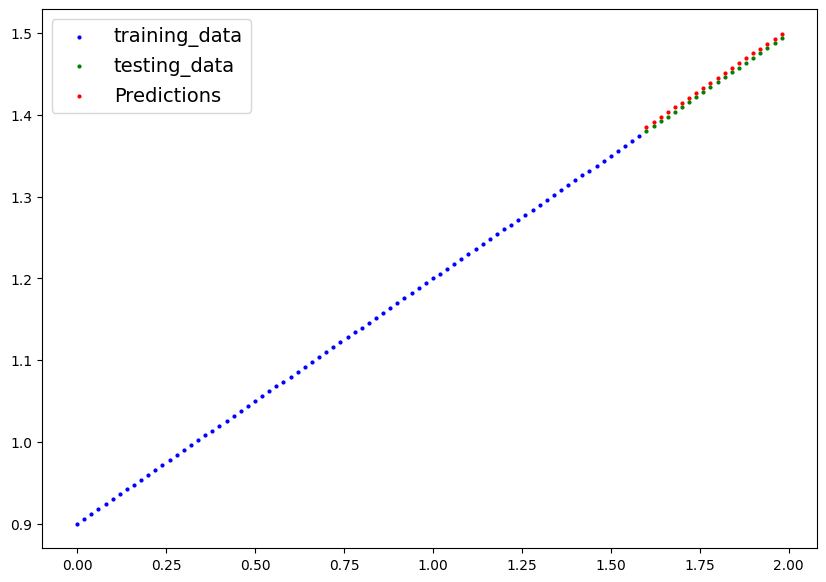

In [ ]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())